<h1 align="center">
    Players Analysis in SQL and Python
</h1>

<h3 align="center">
    By: Shreeyasha Pandey
</h3>

---

## ☰ Project Overview

This project explores trends and patterns within a Major League Baseball (MLB) player dataset using SQL for data extraction and Python for analysis and visualization.

The analysis focuses on player performance, salary distributions, and position-based trends to uncover key insights relevant for stakeholders such as recruiters, coaches, or sports data analysts.

- **Tools:** PostgreSQL, Python (pandas, matplotlib, seaborn), Jupyter Notebook
- **Topics Covered:** Position breakdowns, salary trends, performance metrics

---

## ☰ Dataset Summary

The data is stored in a PostgreSQL relational database containing tables such as:

- `players`: Biographical information of each MLB player
- `salaries`: Yearly salary records by player and team
- `schools`: School and year attended by player
- `schools_details`: School info (name, city, state, country)

We’ll use SQL to extract and filter relevant slices of the data throughout the notebook.

---


## ☰ Table of Contents
1. [Libraries and Database Setup](#1-libraries-and-database-setup)
2. [Loading the Dataset](#2-loading-the-dataset)
3. [School Analysis](#3-school-analysis)
4. [Concluding Summary](#4-concluding-summary)

---

## 1. Libraries and Database Setup <a class="anchor" id="1-libraries-and-database-setup"></a>

### Import Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Environment Variables and DB Connection
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

# Set global seaborn styles
sns.set_style("whitegrid", {"axes.spines.right": False, "axes.spines.top": False, 
                            "axes.spines.left": True,"axes.spines.bottom": True})

### Create Database Engine

In [10]:
# Load from .env file
load_dotenv()

# Fetch credentials from environment
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST", "localhost")
DB_PORT = os.getenv("DB_PORT", "5432")

# Create SQLAlchemy engine
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

## 2. Loading the Dataset <a class="anchor" id="loading-the-dataset"></a>
The following section loads all necessary tables from the PostgreSQL database using SQL queries. Each table is previewed to give a sense of its structure and content.


In [13]:
def load_table(table_name):
    """Load a table from the database into a pandas DataFrame."""
    query = f"SELECT * FROM {table_name};"
    return pd.read_sql(query, con=engine)

In [14]:
# Load the tables
players = load_table("players")
salaries = load_table("salaries")
school_details = load_table("school_details")
schools = load_table("schools")

In [15]:
from IPython.display import display, Markdown

def preview_table(df, table_name, n=2):
    """Preview the first and last few rows of a DataFrame."""
    display(Markdown(f"**Preview of `{table_name}` table**:"))
    display(pd.concat([df.head(n), df.tail(n)]))

## 3. School-Based Analysis

In this section, we analyze the role of educational institutions in producing Major League Baseball (MLB) players. Using data from the `schools` and `school_details` tables, we aim to explore patterns in player origins based on schools, states, and time periods. 

In [17]:
# Preview the tables
preview_table(schools, "schools")
preview_table(school_details, "school_details")

**Preview of `schools` table**:

,playerid,schoolid,yearid
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
17348,zuvelpa01,stanford,1979
17349,zuvelpa01,stanford,1980


**Preview of `school_details` table**:

,schoolid,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
1205,yale,Yale University,New Haven,CT,USA
1206,youngst,Youngstown State University,Youngstown,OH,USA


### 📑 Section Goals:
The following key questions will guide our analysis:

1. **Top Player-Producing Schools:**  
   Identify the top 5 schools that have produced the largest number of MLB players.

2. **Geographic Distribution:**  
   Analyze the locations of these schools — specifically, the states they are based in — to understand regional trends.

3. **School Influence Over Time:**  
   For each decade, determine how many unique schools produced MLB players. This helps capture the breadth of institutions involved across different eras.

4. **Top Schools by Decade:**  
   Identify the top 3 schools that produced the most players in each decade. This will highlight how school influence may have shifted over time.

This analysis will help uncover historical and regional influences in player development and could potentially inform scouting strategies or historical retrospectives.

---

### Top Player-Producing Schools

***SQL Query:***
```sql
SELECT sd.name_full AS school_name, s.players_produced
FROM school_details AS sd
RIGHT JOIN (
	SELECT schoolid, COUNT(DISTINCT playerid) AS players_produced
	FROM schools
	GROUP BY schoolid) AS s
ON sd.schoolid = s.schoolid
ORDER BY s.players_produced DESC
LIMIT 5;


***Query Output:***

In [21]:
query = """
    SELECT sd.name_full AS school_name, s.players_produced
    FROM school_details AS sd
    RIGHT JOIN (
    	SELECT schoolid, COUNT(DISTINCT playerid) AS players_produced
    	FROM schools
    	GROUP BY schoolid) AS s
    ON sd.schoolid = s.schoolid
    ORDER BY s.players_produced DESC
    LIMIT 5;
"""

df_top_five_schools = pd.read_sql(query, con=engine)
df_top_five_schools

,school_name,players_produced
0,University of Texas at Austin,107
1,University of Southern California,105
2,Arizona State University,101
3,Stanford University,86
4,University of Michigan,76


**💡 Insights:**

These schools stand out as major talent pipelines for Major League Baseball, with UT Austin and USC leading the list.

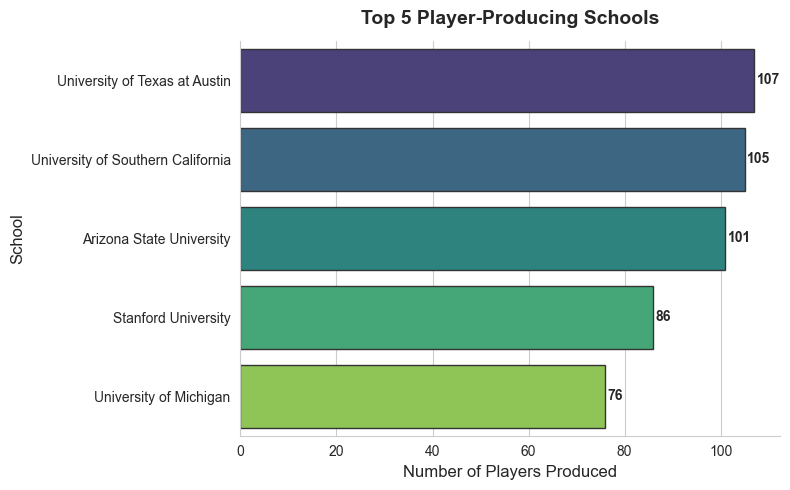

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_top_five_schools, x="players_produced", y="school_name",
            hue="school_name", palette="viridis", edgecolor=".2")

# Add bar labels
for index, value in enumerate(df_top_five_schools["players_produced"]):
    plt.text(value + 0.5, index, str(value), va='center', fontsize=10, fontweight='semibold')

# Axis labels & title
plt.xlabel("Number of Players Produced", fontsize=12)
plt.ylabel("School", fontsize=12)
plt.title("Top 5 Player-Producing Schools", fontsize=14, weight='bold', pad=12)

plt.tight_layout()
plt.show()

### Geographic Distribution
Here, we focus on finding the state that most of the players attended school in.

## 4. Concluding Summary